<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lalit        Geographic Region  Platform  Marketing Channel  Visits  \
0                      0         0                  0    3011   
1                      0         0                  3  119684   
2                      0         0                  4   25612   
3                      0         0                  5    3115   
4                      0         0                  6    5657   
...                  ...       ...                ...     ...   
87851                  3         1                  7   36235   
87852                  3         1                  8   18389   
87853                  3         1                  9     501   
87854                  3         1                 10    9890   
87855                  3         1                  1    7077   

       Qualified Shoppers  Bounced Visits  Gross Orders  Net Orders  
0                    1878             811          1139         957  
1                   82504           26541         12489       10369  
2  

<ipython-input-7-574878c199ce>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


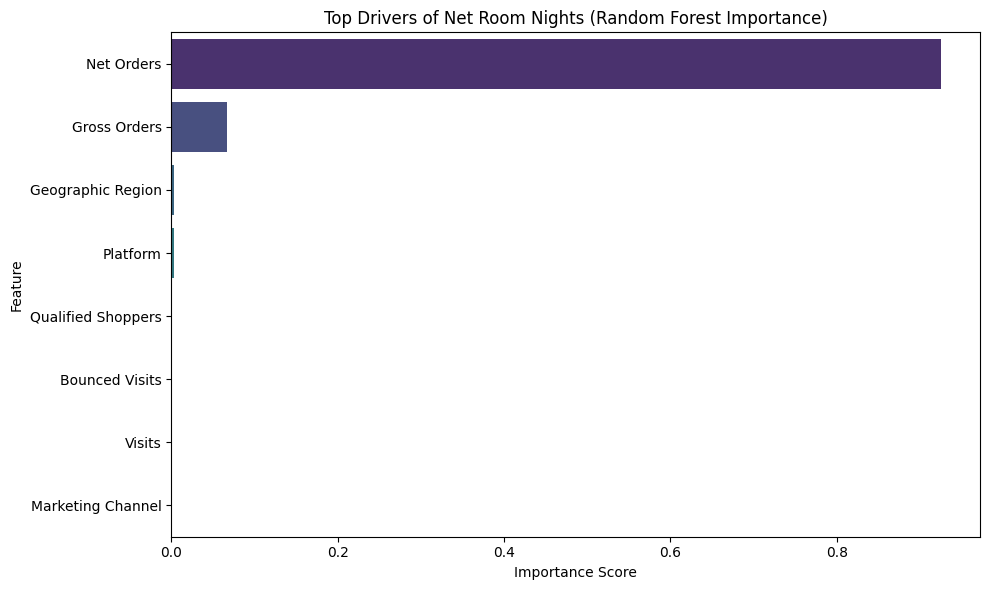

In [ ]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/sample_data/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# Step 1: Encode categorical variables
df_encoded = df.copy()
for col in ['Geographic Region', 'Platform', 'Marketing Channel']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Step 2: Define X and y
X = df_encoded.drop(columns=["Net Room Nights", "Date"])  # Features
print("Lalit",X)
y = df_encoded["Net Room Nights"]  # Target

# Step 3: Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 4: Feature Importance
importances = model.feature_importances_
features = X.columns

# Create DataFrame of importances
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print(importance_df)

# Step 5: Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Top Drivers of Net Room Nights (Random Forest Importance)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# # Add importance score text inside the bars, centered horizontally
# for index, row in importance_df.iterrows():
#     barplot.text(
#         row["Importance"] / 2,  # Halfway along the bar length
#         index,                  # y position (bar index)
#         f'{row["Importance"]:.3f}',  # text label
#         color='white',          # white color to contrast with bars
#         ha='center',            # horizontal alignment center
#         va='center'             # vertical alignment center
#     )

plt.tight_layout()
plt.show()

